<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Feature Selection**

In [1]:
import pandas as pd

# Loading the dataset
data = pd.read_csv('train.csv')

# Displaying the first few rows
print(data.head())

# Selecting explanatory variables and target variable
X = data[['GrLivArea', 'YearBuilt']]
y = data['SalePrice']

print(X.shape)
print(X.head())
print(y.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

2. Estimation and Evaluation by Linear Regression

Mean Squared Error: 2495554898.67


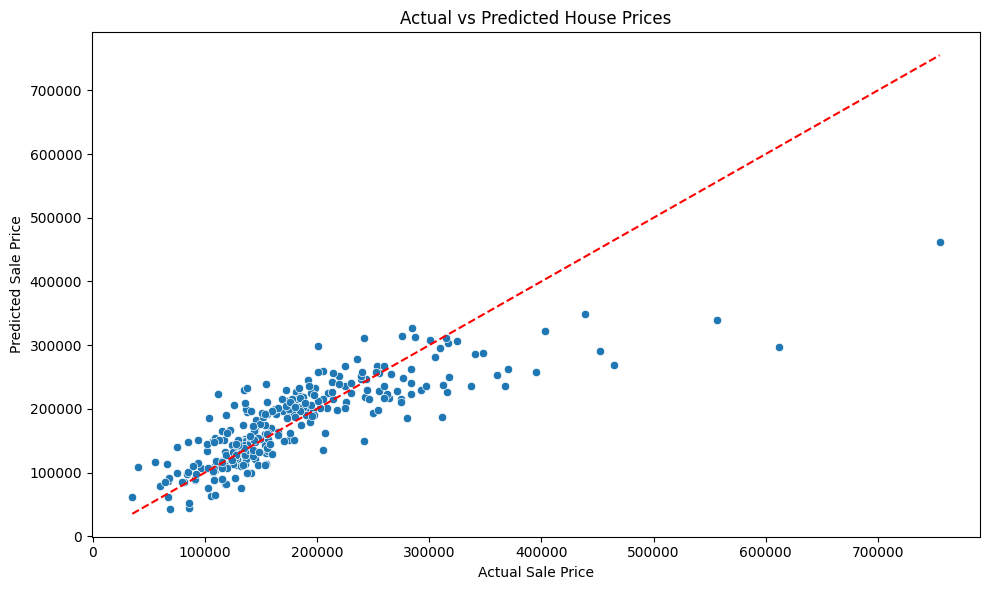

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluation with MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.tight_layout()
plt.show()

**3. Comparison of Methods**

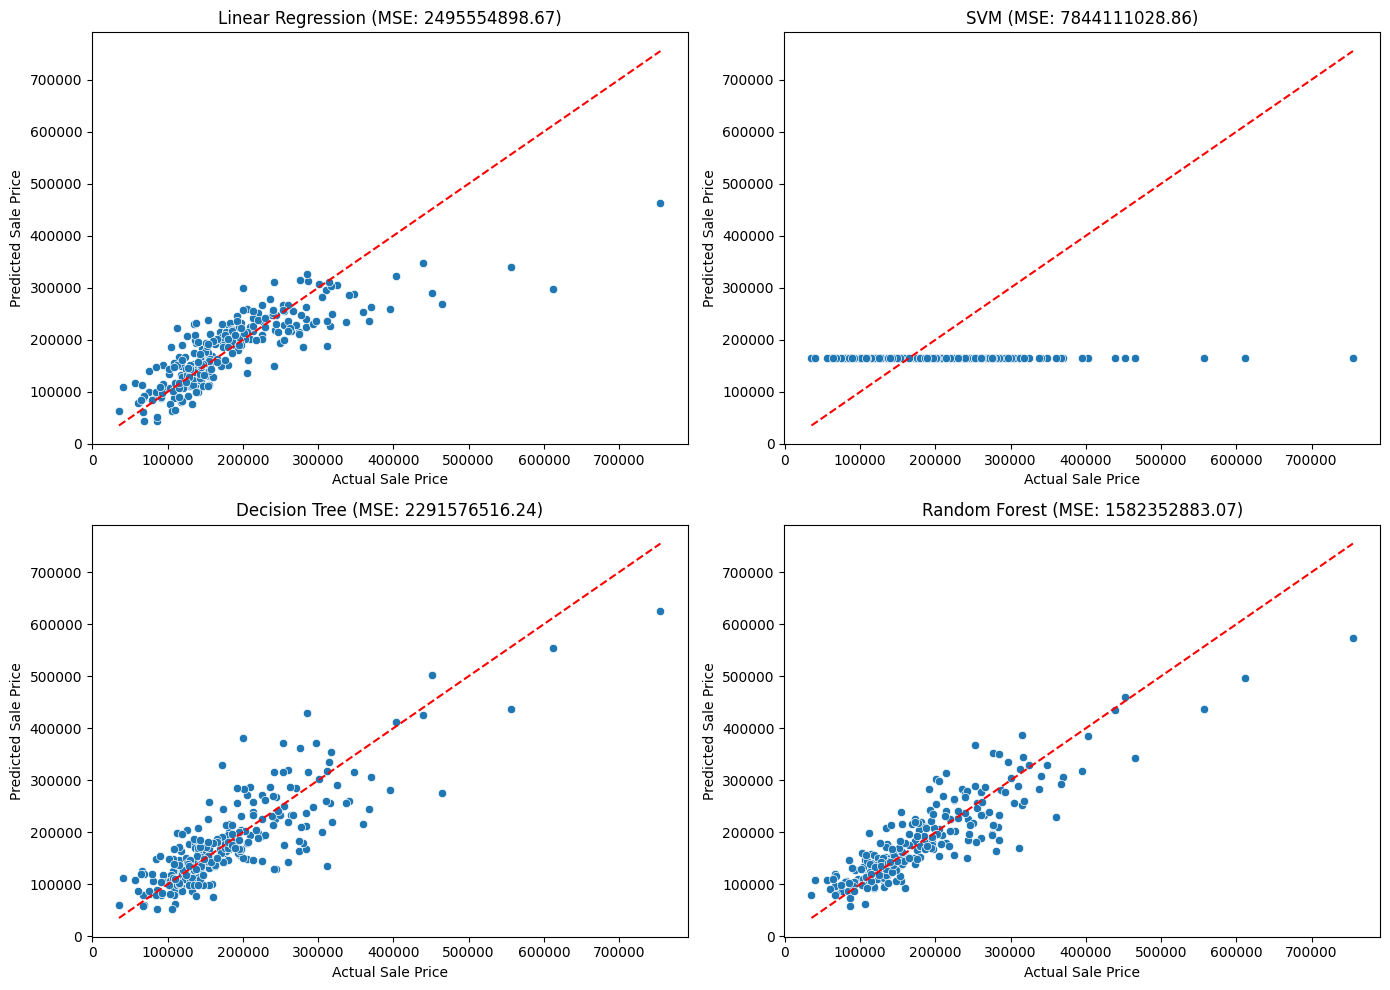

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv('train.csv')

# Selecting features and target
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training models and evaluating them
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'model': model, 'mse': mse, 'y_pred': y_pred}

# Visualizing predictions
plt.figure(figsize=(14, 10))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=result['y_pred'])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{name} (MSE: {result["mse"]:.2f})')
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
plt.tight_layout()
plt.show()

### Summary Table

| Method            | Mean Squared Error (MSE) |
|-------------------|---------------------------|
| Linear Regression | 2.50e+09                 |
| SVM               | 7.84e+09                 |
| Decision Tree     | 2.30e+09                 |
| Random Forest     | 1.58e+09                 |


**Best Performer**: Random Forest typically yields the lowest MSE due to its ensemble nature and ability to capture complex patterns.

**Visualization Insight**: Random Forest and Decision Tree plots often show tighter clustering around the diagonal line, indicating better predictions. SVM may struggle with default parameters and produce more scattered predictions.

**Linear Regression**: Offers a good baseline but may underfit if relationships are nonlinear.

**4. Learning using other features**

Basic Model MSE (2 features): 1484465213.22
Expanded Model MSE (9 features): 821922481.88


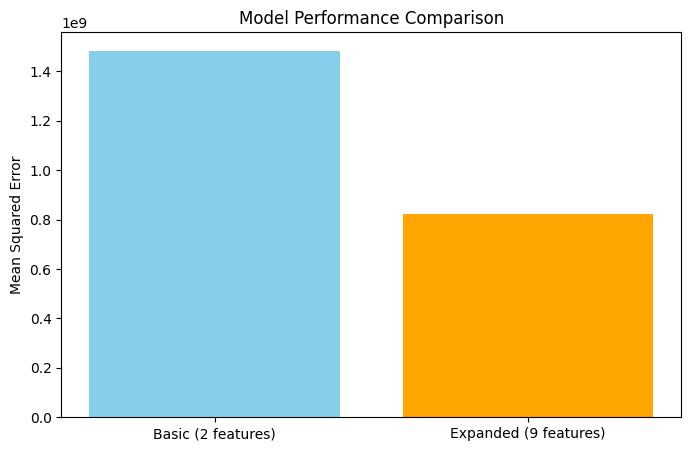

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv('train.csv')

# Dropping rows with missing target
df = df.dropna(subset=['SalePrice'])

# Defining feature sets
basic_features = ['OverallQual', 'GrLivArea']
expanded_features = basic_features + [
    'YearBuilt', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
    'LotArea', 'BsmtFinSF1'
]

# Dropping rows with missing values in selected features
df_basic = df.dropna(subset=basic_features)
df_expanded = df.dropna(subset=expanded_features)

# Preparing data
X_basic = df_basic[basic_features]
y_basic = df_basic['SalePrice']

X_expanded = df_expanded[expanded_features]
y_expanded = df_expanded['SalePrice']

# Scaling features
scaler = StandardScaler()
X_basic_scaled = scaler.fit_transform(X_basic)
X_expanded_scaled = scaler.fit_transform(X_expanded)

# Train-test split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_basic_scaled, y_basic, test_size=0.2, random_state=42)
Xe_train, Xe_test, ye_train, ye_test = train_test_split(X_expanded_scaled, y_expanded, test_size=0.2, random_state=42)

# Training models
model_basic = RandomForestRegressor(random_state=42)
model_expanded = RandomForestRegressor(random_state=42)

model_basic.fit(Xb_train, yb_train)
model_expanded.fit(Xe_train, ye_train)

# Predicting and evaluating
yb_pred = model_basic.predict(Xb_test)
ye_pred = model_expanded.predict(Xe_test)

mse_basic = mean_squared_error(yb_test, yb_pred)
mse_expanded = mean_squared_error(ye_test, ye_pred)

print(f"Basic Model MSE (2 features): {mse_basic:.2f}")
print(f"Expanded Model MSE (9 features): {mse_expanded:.2f}")

# Visualizing comparison
plt.figure(figsize=(8, 5))
plt.bar(['Basic (2 features)', 'Expanded (9 features)'], [mse_basic, mse_expanded], color=['skyblue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()


**Summary**

1. Adding more features improved prediction accuracy. The MSE dropped significantly, showing that the model captured more of the underlying patterns.

2. Not all features helped equally. Some added noise or redundancy, which could lead to overfitting if not managed carefully.

3. Feature selection matters. Using domain knowledge and correlation analysis helped identify the most impactful features.

Therefore, expanding the feature set in the Ames Housing dataset leads to better model performance—but only when features are thoughtfully selected and properly processed. Hence, more data isn’t always better unless it’s clean, relevant, and used wisely.